<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Python_ile_Makine_%C3%96%C4%9Frenmesi_Regresyon_Modellerinin_De%C4%9Ferlendirilmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Sklearn kütüphanesini içe aktar
from sklearn.linear_model import LinearRegression #doğrusal
from sklearn.preprocessing import PolynomialFeatures #polinomsal
from sklearn.metrics import r2_score # r kare

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BTK/DATASET/dogrusal_regresyon_veriseti_20220209.csv", sep = ";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


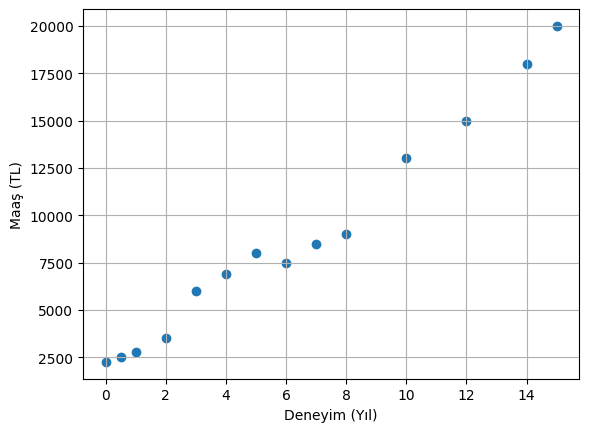

In [3]:
#veriyi görselleştir
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.grid(True)
plt.show()

In [4]:
# Doğrusal Regresyon Modeli Eğitimi

# Doğrusal Regresyon Modeli
linear_reg = LinearRegression()
#data içerisinde bulunan maas ve deneyim sütunlarını numpy array'e çevir
x= df.deneyim.values.reshape(-1,1) #scikit learn için bu format çok önemli
y= df.maas.values.reshape(-1,1)
linear_reg.fit(x,y)


LinearRegression()

In [7]:
# polinomsal regresyon modeki eğitimi
polinom_regresyon = PolynomialFeatures(degree = 2) # 2. dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
# %% polinomsal regresyon eğitebilmek için polinomsal özellikler ile
poly_reg = LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

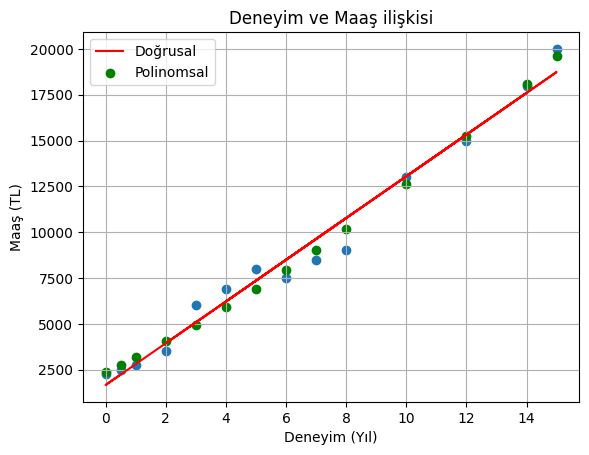

In [10]:
# test
y_tahmin_linear = linear_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x,y_tahmin_linear,color = "red", label = "Doğrusal")
plt.scatter(x,y_tahmin_poly,color = "green", label = "Polinomsal")
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim ve Maaş ilişkisi")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
print("Doğrusal R2 Değeri: ", r2_score(y,y_tahmin_linear))
print("Polinomsal R2 Değeri: ", r2_score(y,y_tahmin_poly))

Doğrusal R2 Değeri:  0.9775283164949903
Polinomsal R2 Değeri:  0.9854449464578782


Polinomsal regresyon modelinin R kare sonucu, doğrusal regresyon modelinin R kare sonucuna göre 1'e daha yakın.

Polinomsal regresyonun derecesi arttıkça, R kare sonucu 1'e daha da yaklaşacaktır. (Overfitting'e dikkat edilmelidir)